# Testing the user defined function

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
from tuner import Tuner

In [3]:
from scipy.stats import uniform


param_dict = {"a": uniform(0, 10),
              "b": range(1,10),
              "c":[1,2,3],
              "d":["-1","1"]
             }


# userObjective

In [4]:
def objectiveFunction(args_list):
    results = []
    for hyper_par in args_list:
        a = hyper_par['a']
        b = hyper_par['b']
        c = hyper_par['c']
        d = hyper_par['d']
        result = (a + b + c + int(d))
        results.append(result)
    return results

# Defining Tuner

In [5]:
tuner_user = Tuner(param_dict, objectiveFunction)

In [6]:
tuner_user.getConf()

{'param_dict': {'a': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1ecb9320>,
  'b': range(1, 10),
  'c': [1, 2, 3],
  'd': ['-1', '1']},
 'userObjective': <function __main__.objectiveFunction(args_list)>,
 'domain_size': 5000,
 'initial_random': 1,
 'num_iteration': 20,
 'objective': 'maximize',
 'batch_size': 1}

In [7]:
results = tuner_user.run()

# Inspect the results

In [8]:
print('best hyper parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best hyper parameters: {'a': 9.94781223465861, 'b': 9, 'c': 1, 'd': '1'}
best objective: 20.94781223465861


In [9]:
print('Sample hyper parameters tried:',len(results['hyper_parameters_tried']))
print(results['hyper_parameters_tried'][:2])

Sample hyper parameters tried: 21
[{'a': 5.769590274442967, 'b': 8, 'c': 1, 'd': '-1'}, {'a': 0.08331161047123725, 'b': 1, 'c': 3, 'd': '1'}]


In [10]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 21
[13.769590274442967, 5.083311610471237, 15.491570944495436, 14.972845648742654, 13.009679881898679]


# Plotting the variation in objective values of the tried results

In [11]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

<Figure size 3000x500 with 1 Axes>

# Plotting the variation of Max objective values of the tried results

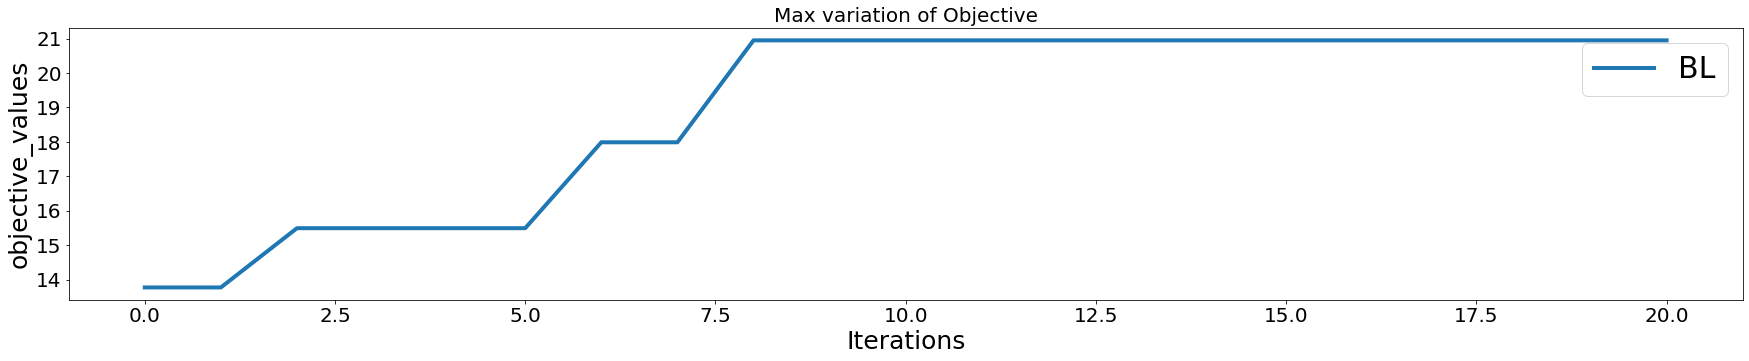

In [12]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the result

In [13]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_hyper_parameter': {'a': 9.94781223465861, 'b': 9, 'c': 1, 'd': '1'},
    'best_objective': 20.94781223465861,
    'hyper_parameters_tried': [   {   'a': 5.769590274442967,
                                      'b': 8,
                                      'c': 1,
                                      'd': '-1'},
                                  {   'a': 0.08331161047123725,
                                      'b': 1,
                                      'c': 3,
                                      'd': '1'},
                                  {   'a': 6.491570944495435,
                                      'b': 9,
                                      'c': 1,
                                      'd': '-1'},
                                  {   'a': 9.972845648742654,
                                      'b': 1,
                                      'c': 3,
                                      'd': '1'},
                                  {   'a': 0.009679881898678744,